<a href="https://colab.research.google.com/github/EroshBc/DataSceince/blob/main/DL_CH04_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

In [ ]:
from keras.api._v2.keras import metrics
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs =4,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/4
30/30 [==============================] - 2s 74ms/step - loss: 0.0127 - accuracy: 0.9982 - val_loss: 0.5998 - val_accuracy: 0.8709
Epoch 2/4
30/30 [==============================] - 1s 44ms/step - loss: 0.0119 - accuracy: 0.9976 - val_loss: 0.6278 - val_accuracy: 0.8707
Epoch 3/4
30/30 [==============================] - 1s 43ms/step - loss: 0.0053 - accuracy: 0.9999 - val_loss: 0.6600 - val_accuracy: 0.8654
Epoch 4/4
30/30 [==============================] - 1s 41ms/step - loss: 0.0114 - accuracy: 0.9977 - val_loss: 0.6627 - val_accuracy: 0.8713


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

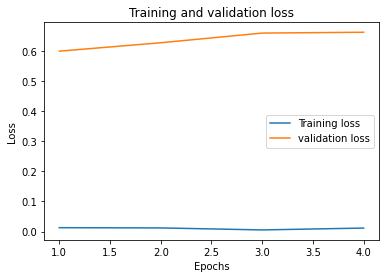

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values, label ="Training loss")
plt.plot(epochs,val_loss_values, label="validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

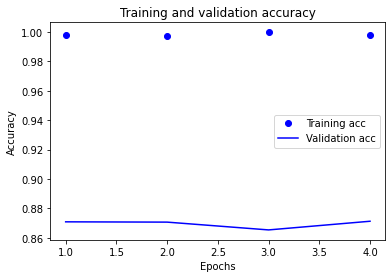

In [ ]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [ ]:
from pyparsing import results
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.7136 - accuracy: 0.8580


In [ ]:
results

[0.713550329208374, 0.8580399751663208]

In [ ]:

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),

])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 33ms/step - loss: 0.4916 - accuracy: 0.8032
Epoch 2/4
49/49 [==============================] - 2s 42ms/step - loss: 0.2874 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 2s 40ms/step - loss: 0.2243 - accuracy: 0.9204
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.2812 - accuracy: 0.8878


In [ ]:
results

[0.2811632752418518, 0.8878399729728699]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

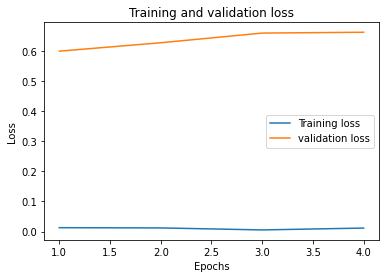

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values, label ="Training loss")
plt.plot(epochs,val_loss_values, label="validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

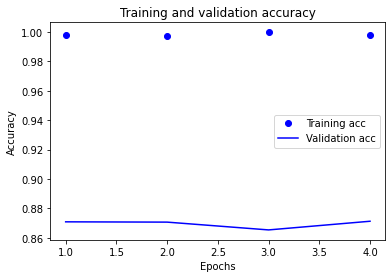

In [ ]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.21006534],
       [0.99836665],
       [0.84611887],
       ...,
       [0.09372506],
       [0.09130958],
       [0.55948484]], dtype=float32)